<a href="https://colab.research.google.com/github/Sudip-06/Sudip-06/blob/main/iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **iris classification**


The Iris Classification project involves creating a machine learning model to classify iris flowers into three
species (Setosa, Versicolour, and Virginica) based on the length and width of their petals and sepals. This is a
classic problem in machine learning and is often used as an introductory example for classification algorithms.

**Problem Statement :**

*   The model should achieve a high level of accuracy in classifying iris species.
*   The model's predictions should be consistent and reliable, as measured by cross-validation.
*   The final report should provide clear and comprehensive documentation of the project, including all
code, visualizations, and findings.


**import libraies**

In [ ]:
# import libraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report

**Import and Load the Data**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Iris.csv")

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# show the tail of the data
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


**Exploratory Data Analysis**

In [ ]:
# show the shape of the data
df.shape

(150, 5)

In [ ]:
# show the summary statistics of the data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Check if there any missing values in the dataset
df.isnull().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


So, Dataset is fine. No missing values found.

array([[<Axes: title={'center': 'SepalLengthCm'}>,
        <Axes: title={'center': 'SepalWidthCm'}>],
       [<Axes: title={'center': 'PetalLengthCm'}>,
        <Axes: title={'center': 'PetalWidthCm'}>]], dtype=object)

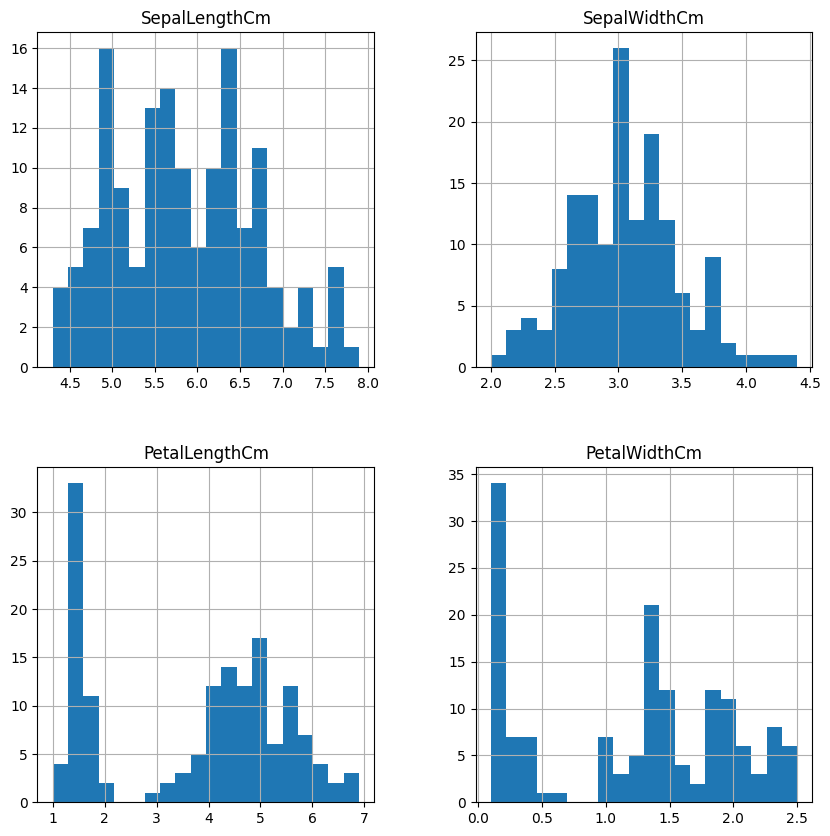

In [ ]:
# univariate analysis (histograms)
df.hist(figsize=(10,10), bins=20)

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

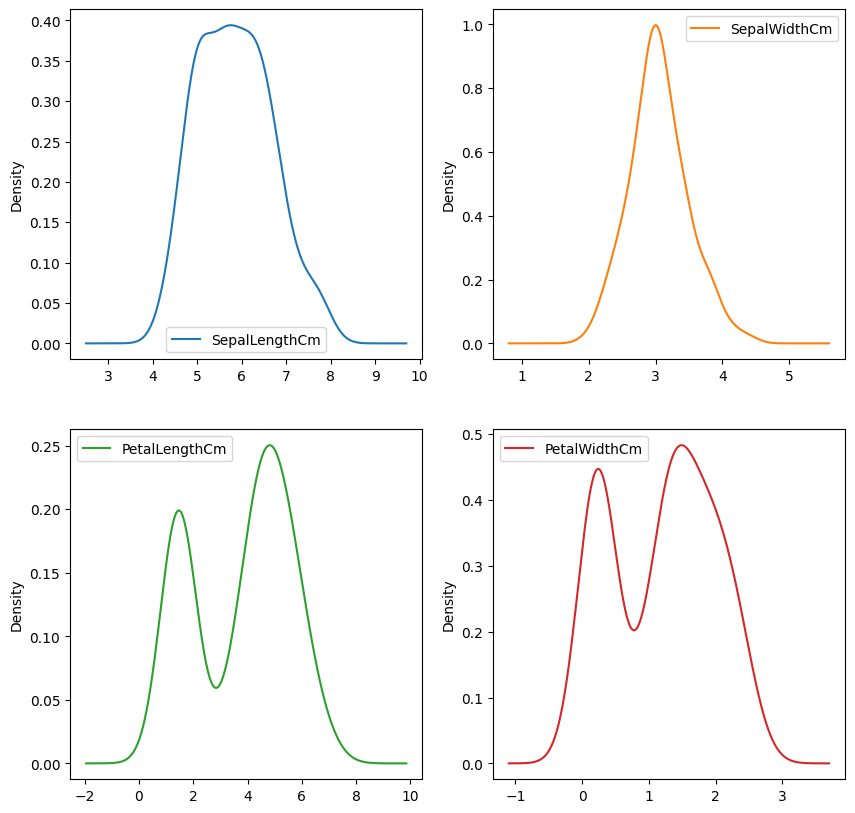

In [ ]:
# kernel density estimation (KDE) through pandas
df.plot(kind="kde", subplots=True, layout=(2, 2), figsize=(10, 10), sharex=False, sharey=False)

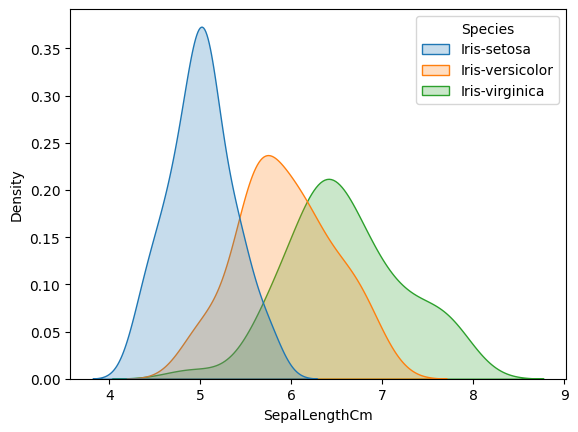

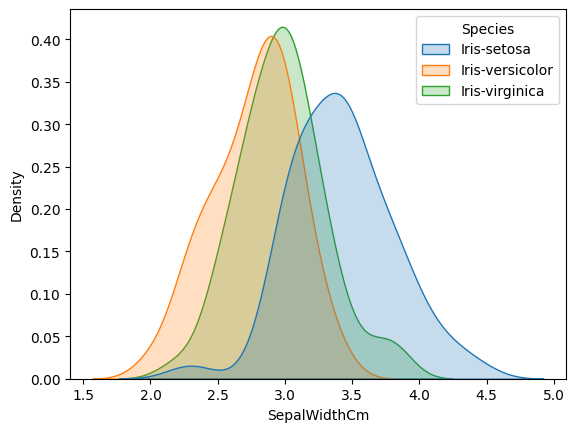

In [ ]:
# kernel density estimation (KDE) through seaborn
# kernel density estimation (KDE) through seaborn
sns.kdeplot(data=df, x="SepalLengthCm", hue="Species", fill=True)
plt.show()
sns.kdeplot(data=df, x="SepalWidthCm", hue="Species", fill=True)
plt.show()

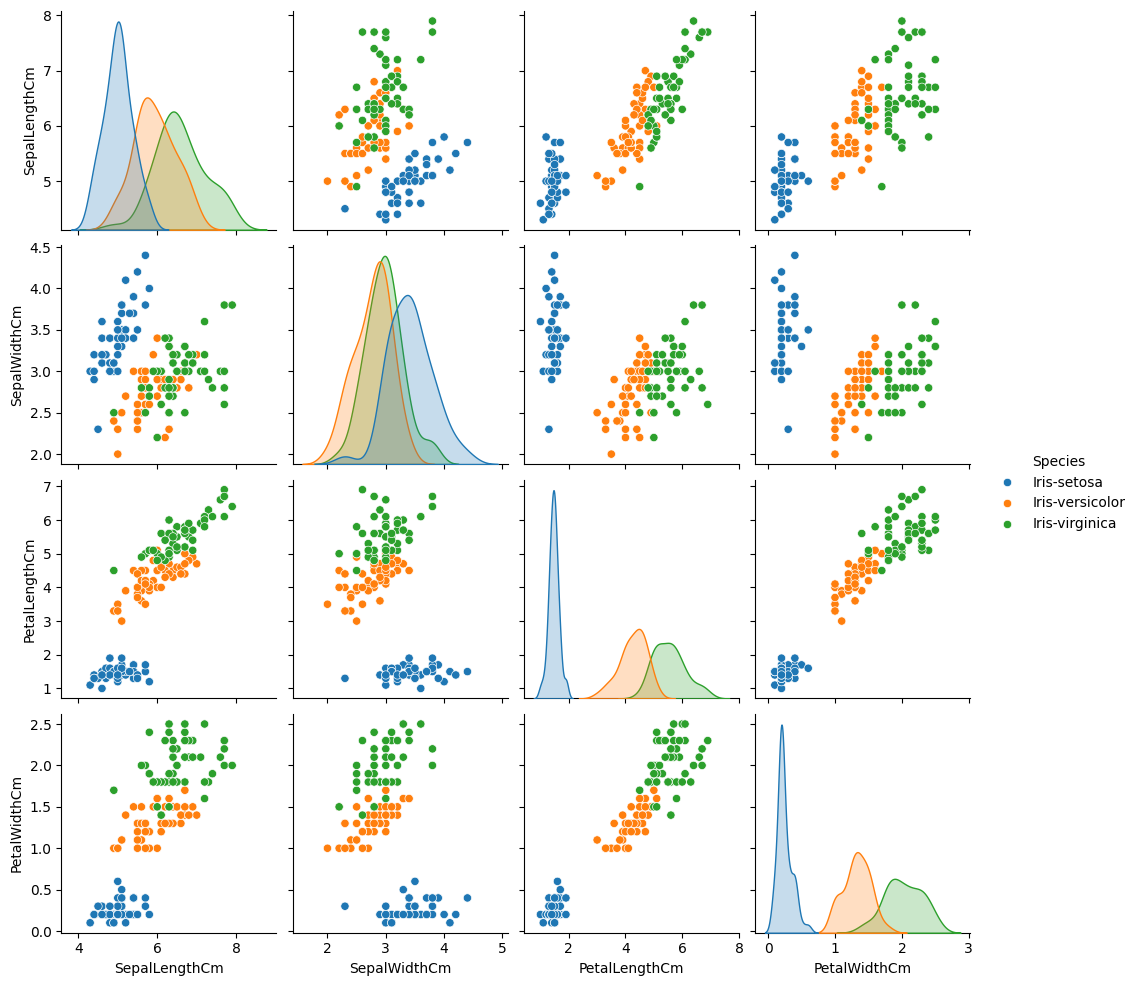

In [ ]:
# pairwise plot of all features
sns.pairplot(df, hue="Species")

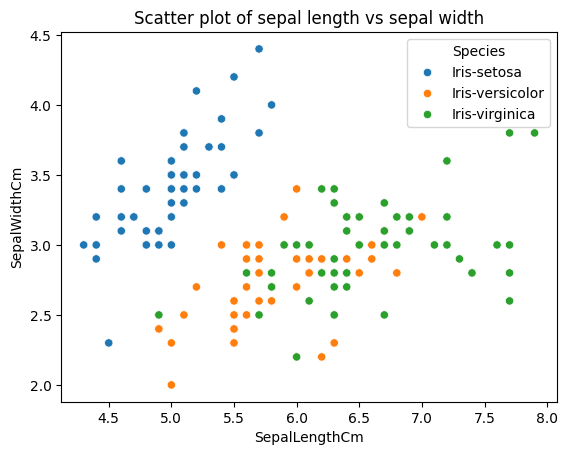

In [ ]:
# Scatter plot
sns.scatterplot(data=df, x="SepalLengthCm", y="SepalWidthCm", hue="Species")
plt.title("Scatter plot of sepal length vs sepal width")
plt.show()


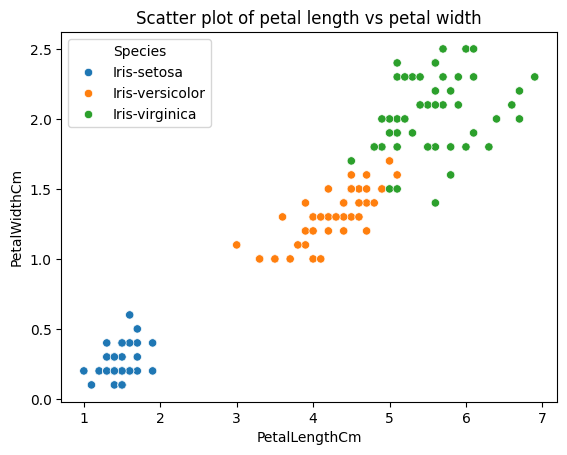

In [ ]:
sns.scatterplot(data=df, x="PetalLengthCm", y="PetalWidthCm", hue="Species")
plt.title("Scatter plot of petal length vs petal width")
plt.show()

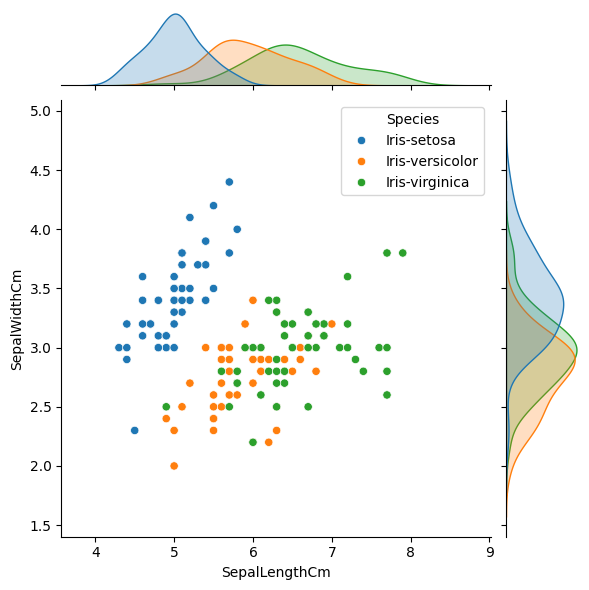

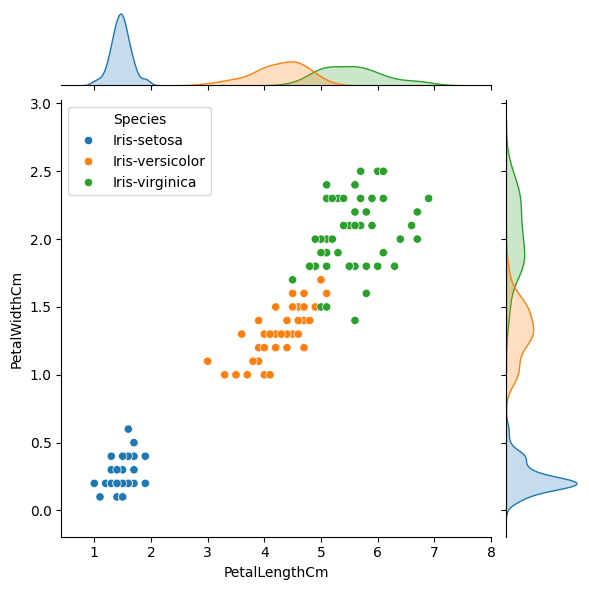

In [ ]:
# joinplot
def plot_joint(x, y):
    sns.jointplot(data=df, x=x, y=y, hue="Species")

plot_joint("SepalLengthCm", "SepalWidthCm")
plot_joint("PetalLengthCm", "PetalWidthCm")

<Axes: xlabel='Species', ylabel='count'>

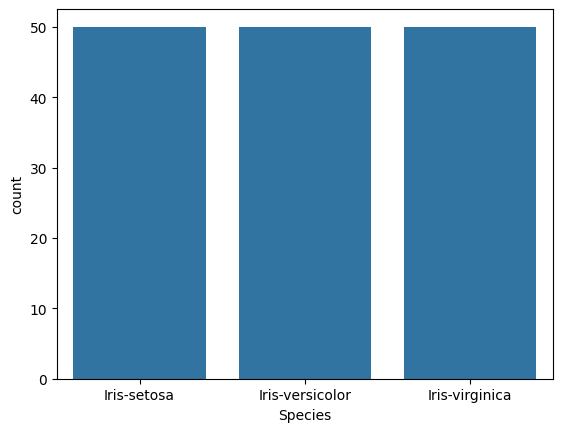

In [ ]:
# countplot
sns.countplot(data=df, x="Species")

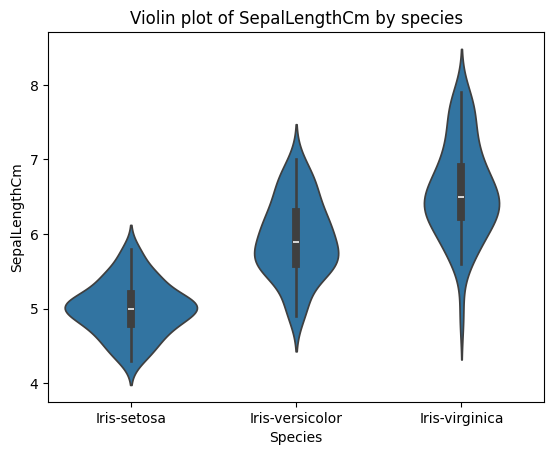

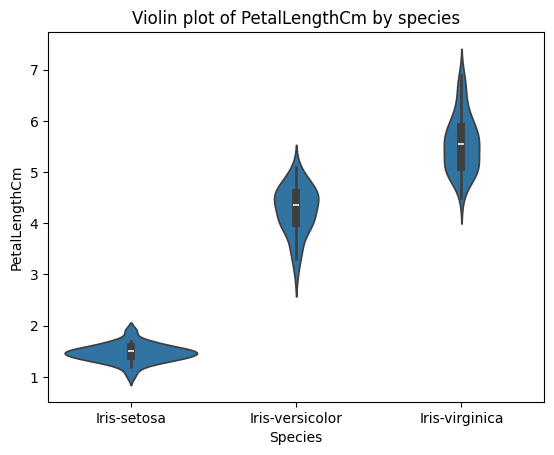

In [ ]:
# violon plot
def plot_violin(y):
    sns.violinplot(data=df, x="Species", y=y)
    plt.title(f"Violin plot of {y} by species")
    plt.show()

plot_violin("SepalLengthCm")
plot_violin("PetalLengthCm")

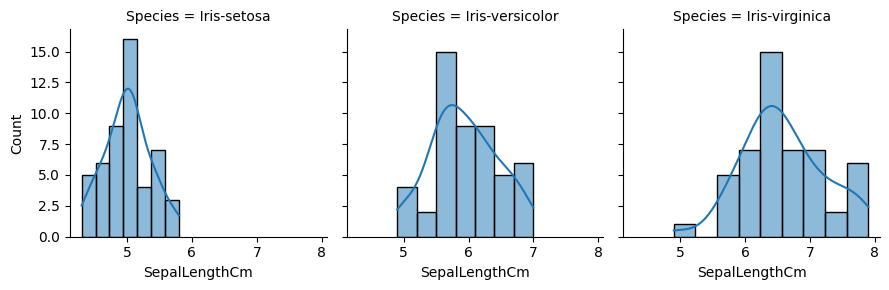

In [ ]:
# facetgrid
g = sns.FacetGrid(df, col='Species')
g.map(sns.histplot, 'SepalLengthCm', kde=True)

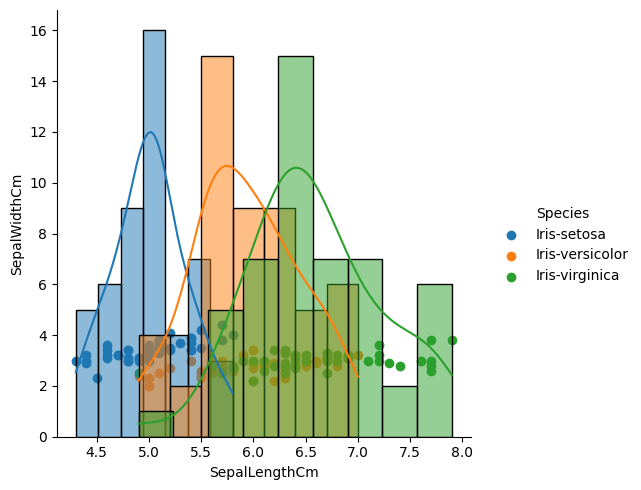

In [ ]:
# facetgrid
g = sns.FacetGrid(df, hue="Species", height=5).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()
g.map(sns.histplot, 'SepalLengthCm', kde=True)

In [ ]:
# check the unique values in the target variable
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
# check the count of each class
df["Species"].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
# initialize the label encoder
le = LabelEncoder()
df["Species"] = le.fit_transform(df["Species"])

In [ ]:
# convert the encoded values to float
df["Species"] = df["Species"].astype(float)

<Axes: >

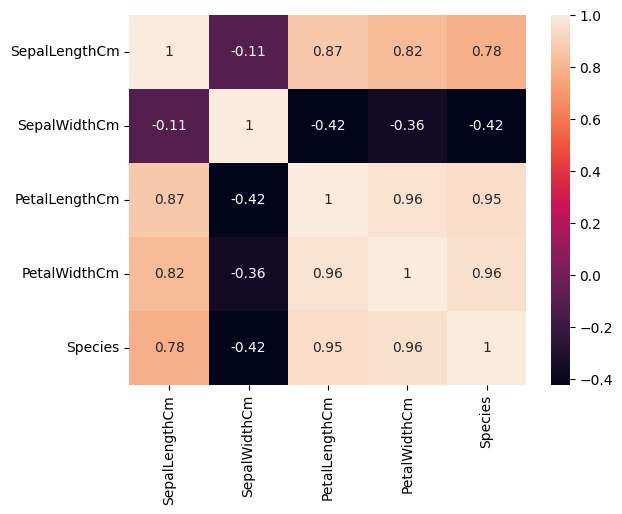

In [ ]:
# correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True)

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

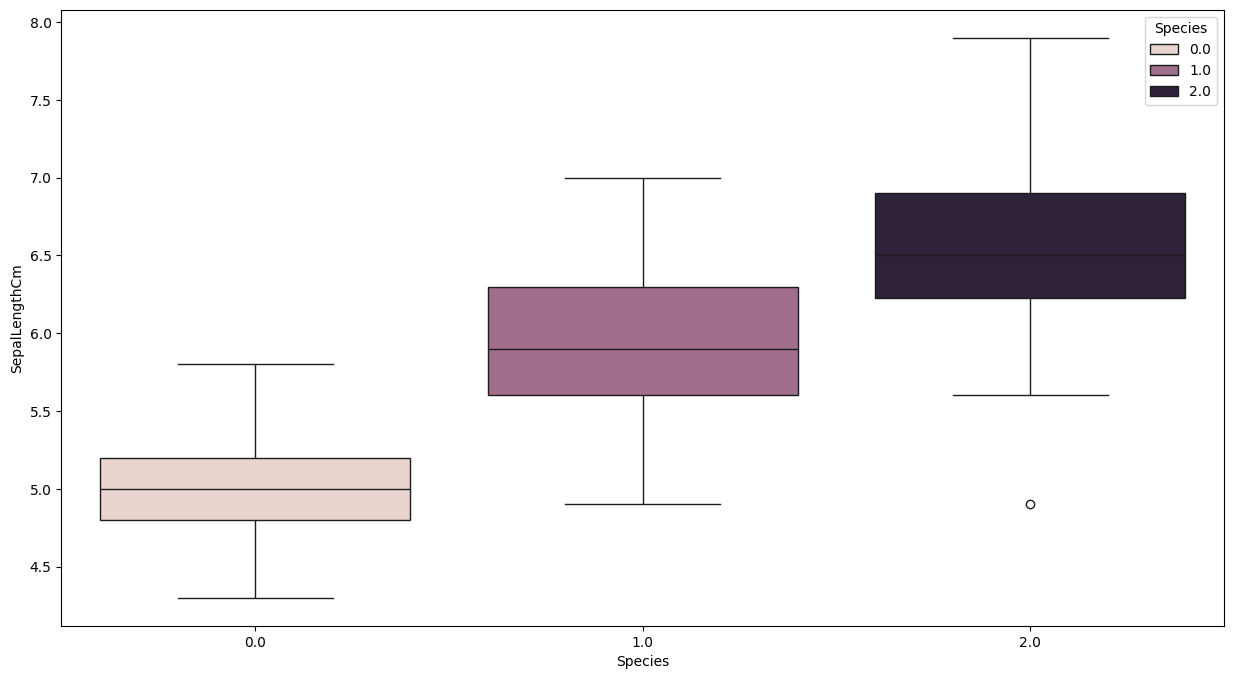

In [ ]:
# relationship between species and sepal length
plt.figure(figsize=(15,8))
sns.boxplot(x='Species', y='SepalLengthCm', data=df.sort_values('SepalLengthCm', ascending=False), hue='Species')

<Axes: xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

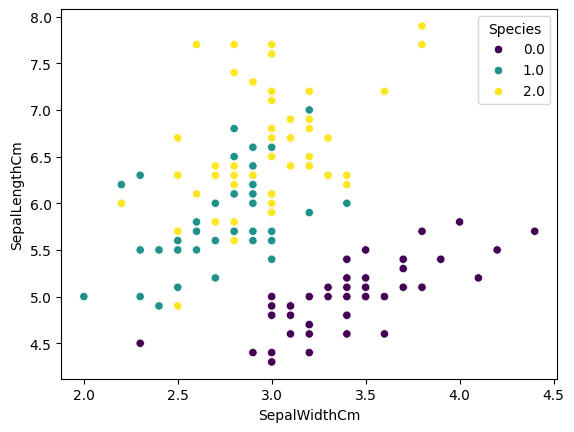

In [ ]:
# Relationship between species and sepal width
sns.scatterplot(df, x='SepalWidthCm', y='SepalLengthCm', hue='Species', palette='viridis')

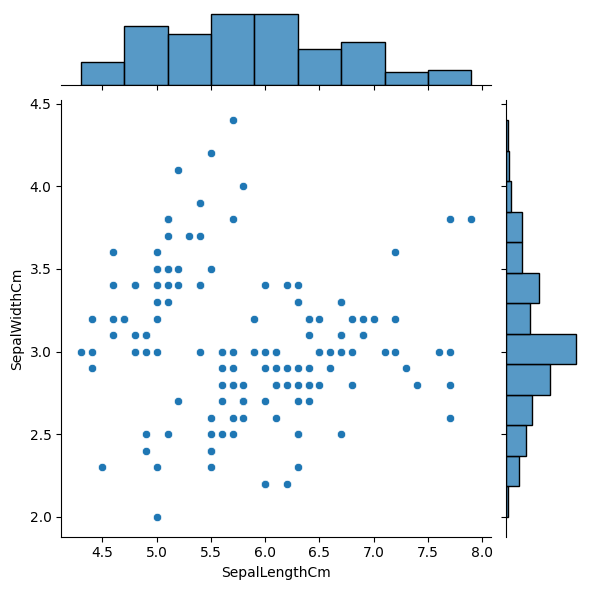

In [ ]:
# Relationship between sepal_width and sepal_length
sns.jointplot(df, x='SepalLengthCm', y='SepalWidthCm')

array([[<Axes: title={'center': 'PetalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'PetalWidthCm'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'SepalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

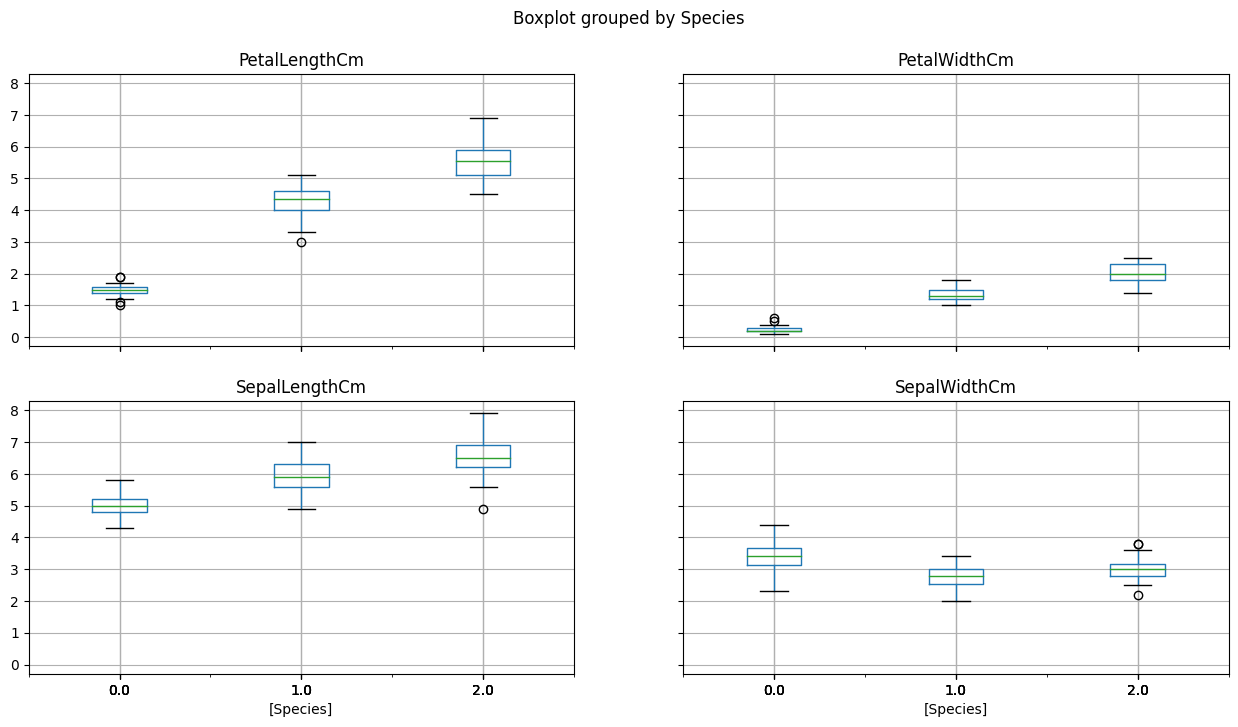

In [ ]:
# boxplot
df.boxplot(by='Species', figsize=(15, 8))

<Axes: >

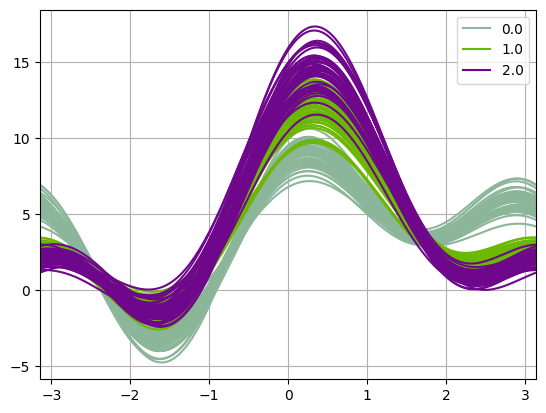

In [ ]:
# Andrews_curves
import pandas.plotting
from pandas.plotting import andrews_curves
andrews_curves(df, 'Species')

<Figure size 1500x1500 with 0 Axes>

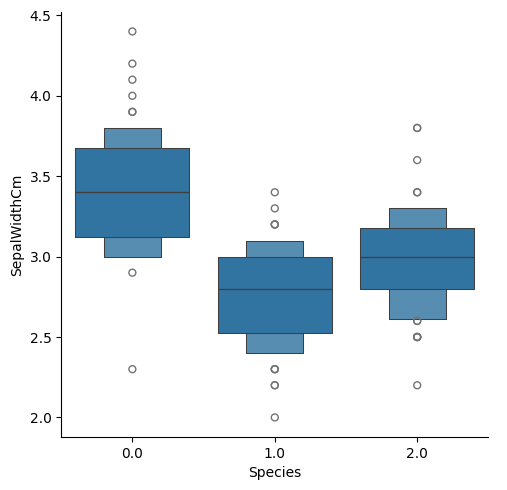

In [ ]:
# categorical plot
plt.figure(figsize=(15,15))
sns.catplot(x='Species',y='SepalWidthCm',data=df.sort_values('SepalWidthCm',ascending=False),kind='boxen')

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

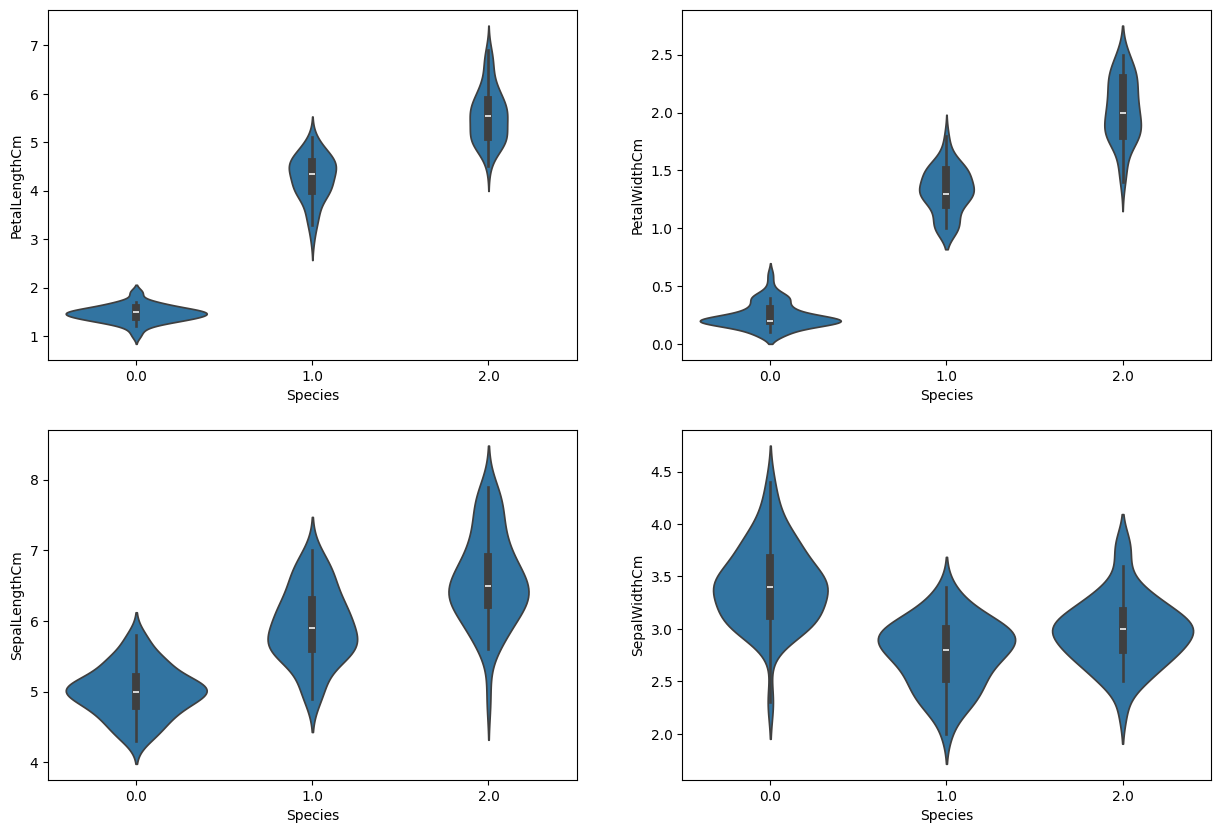

In [ ]:
# violinplot
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

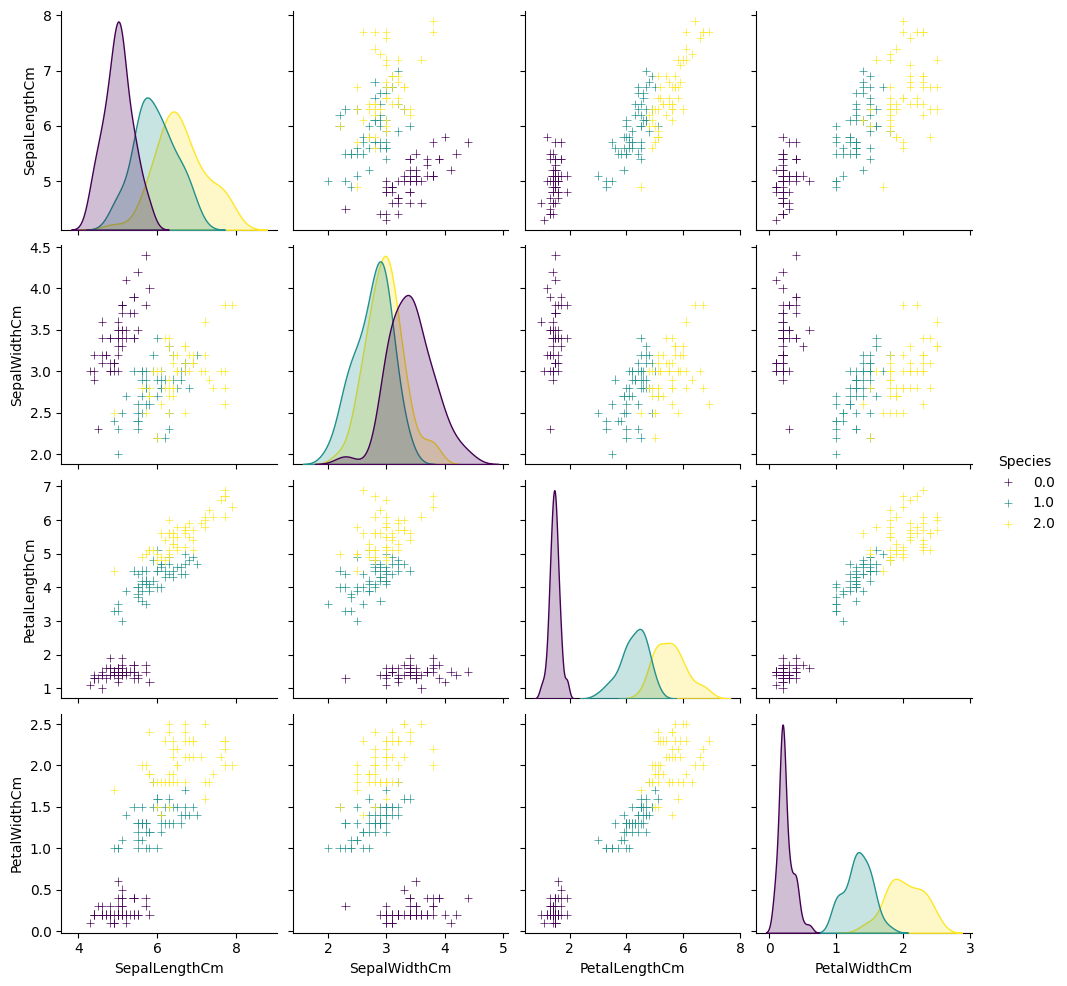

In [ ]:
# pairplot
g = sns.pairplot(df, hue='Species', markers='+', palette='viridis')
plt.show()

# Insights from EDA on the Iris Dataset
* Petal length and petal width are strong indicators for distinguishing species.
 *  Setosa is easily separable with smaller petal measurements.
 * Versicolor and Virginica overlap but can be distinguished by petal measurements.
* Sepal length and sepal width show overlap and are less effective at distinguishing species.
* Petal length and width have non-overlapping regions for the species.
* Sepal width has a wide spread, making it less useful in classification.
* Boxplots show Setosa has a tighter distribution for sepal and petal length, while Versicolor and Virginica show variability.
* Petal length and width are highly positively correlated.
* Sepal width negatively correlates with petal measurements, limiting its usefulness.
* The dataset is balanced across the three species, with no class imbalance.
* Petal length and petal width show clear clusters for each species, making them useful for classification.
* Setosa has the smallest sepal length, Virginica the largest, with Versicolor and Virginica showing overlap.
* Setosa often has a higher sepal width, with significant overlap between Versicolor and Virginica.
* Sepal width and length show little correlation and overlap between species.
* Petal length and width show clear species separation, while sepal width has variability.
* Outliers are visible, especially in Virginica's sepal width, needing attention in preprocessing.
* Andrews curves show Setosa as distinct, while Versicolor and Virginica overlap.
* Categorical plots confirm Setosa's clear separation by petal length and width.
* Violin plots show tightly grouped features for Setosa, while Versicolor and Virginica have wider distributions.
* Petal measurements are key for classification, while sepal features show overlap between species.
* Outliers, particularly in Virginica's sepal width, may impact model training.
* Setosa is distinct, while Versicolor and Virginica show some overlap, especially in sepal features.

# Data Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the feature columns (excluding the target 'species')
X_scaled = scaler.fit_transform(df.drop('Species', axis=1))

# Update the dataframe
df_scaled = pd.DataFrame(X_scaled, columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

# Add the species column back to the scaled dataframe
df_scaled['Species'] = df['Species']

In [ ]:
df_scaled.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.900681,1.032057,-1.341272,-1.312977,0.0
1,-1.143017,-0.124958,-1.341272,-1.312977,0.0
2,-1.385353,0.337848,-1.398138,-1.312977,0.0
3,-1.506521,0.106445,-1.284407,-1.312977,0.0
4,-1.021849,1.263460,-1.341272,-1.312977,0.0


# Data Splitting

In [ ]:
# define features (X) and target (y)
X = df_scaled.drop("Species", axis=1)
y = df_scaled["Species"]

# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# check the sizes of the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


#Model Selection

In [ ]:
from sklearn.linear_model import LogisticRegression

# initialize the model
log_reg = LogisticRegression()

# fit the model
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# make predictions
y_pred = log_reg.predict(X_test)

# evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



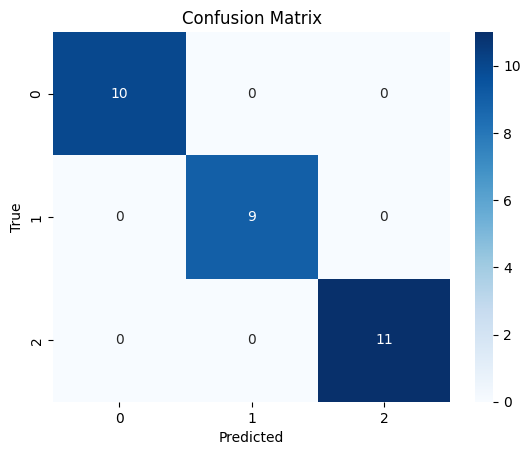

In [ ]:
# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# initialize the model
dtc = DecisionTreeClassifier()

# fit the model
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# predict the model
y_pred = dtc.predict(X_test)

# evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



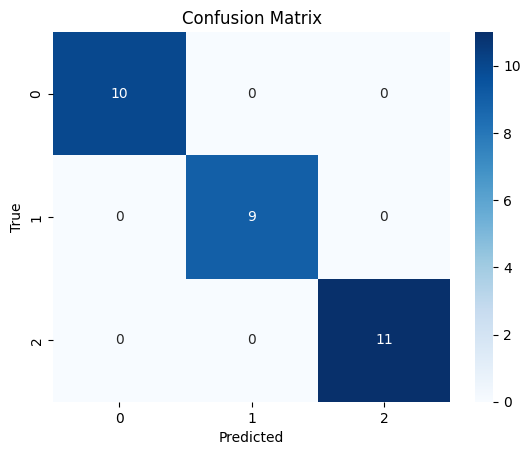

In [ ]:
# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.svm import SVC

# initialize the model
svm = SVC()

# fit the model
svm.fit(X_train, y_train)

SVC()

In [ ]:
# make predictions
y_pred = svm.predict(X_test)

# evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluation
print("k-NN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("k-NN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("k-NN Classification Report:\n", classification_report(y_test, y_pred_knn))

k-NN Accuracy: 1.0
k-NN Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
k-NN Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize all models again for convenience (already done, but just summarizing)
logreg = LogisticRegression()
dtree = DecisionTreeClassifier(random_state=42)
svm_model = SVC()
knn = KNeighborsClassifier(n_neighbors=3)

# Fit all models
models = {
    "Logistic Regression": logreg,
    "Decision Tree": dtree,
    "SVM": svm_model,
    "k-NN": knn
}

# Train each model and evaluate
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate
    print(f"\n--- {model_name} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")


--- Logistic Regression ---
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

--- Decision Tree ---
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 1

#Conclusion and Insights
* **Simple Dataset:** The Iris dataset is small and well-structured, with clear separations between species based on features.

* **Distinct Features:** Petal length and petal width are strong indicators that effectively differentiate the species.

* **Balanced Classes:** The dataset contains an equal number of samples for each species, preventing class imbalance issues.

* **Low Complexity:** The relationships among features are relatively simple, making it easier for models to capture patterns.

* **Effective Algorithms:** All tested algorithms (Logistic Regression, Decision Tree, SVM, k-NN) are capable of perfectly fitting the training data.

* **No Noise:** The dataset appears to have minimal noise or outliers, contributing to clearer decision boundaries for classification.

* **Training Size:** The small size of the dataset allows for memorization by the models, leading to perfect accuracy on the training data.